<a href="https://colab.research.google.com/github/HarshaV05/rand.stuff.imp/blob/B1/7COM1074_Visualisation_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7COM1074 Applied Data Science and Analytics
# Coursework 1 - Visualisation

Provided is this jupyter notebook. Contained are all instructions necessary to complete the assignment.

This assignment is weighted with 20% of the total marks you can score in this module.


## Marking criteria
A total of 100 marks can be obtained.

20 marks will be awarded to a notebook that is valid and free of coding errors. That is, it should load without error on a university machine, and all cells can be run without any errors. *Hint:* Check via "Kernel" -> "Restart & Run All" in the menu bar. 

The remaining 80 marks will awarded for solving the 9 tasks, and distibuted as indicated.


## What to submit
You will have to submit 5 files:
1. This notebook, completed as instructed, in .ipynb file format;
2. This notebook, completed as instucted, in .html format;
3. 1 PCA scatter plot figure, PNG format;
4. 1 PCA components figure, PNG format;
5. 1 PCA scree plot figure, SVG format.

### Task 1 - Load the data (No marks)
Execute the provided code. It will load the data and create a data frame. 

Notice that it stores the `target` variable from the data set as `house_prices`. You will need that later.

In [0]:
import pandas as pd
import sklearn.datasets as data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

boston = data.load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
house_prices = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Task 2 - Identify categorical features (4 marks)
The cell below prints the description of the data set. Read this description and identify the feature that is  categorical. In the text cell provided, specify the name of the categorical feature and justify why you decided it is categorical.

**Remark**: The 'MEDV' feature is mentioned in the attribute information but it is not present in the features. The reason is that the 'MEDV' feature is the target variable. 

In [0]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
print(boston_df.shape

(506, 13)

In [0]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [0]:
boston_df.agg(['count','nunique'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506,506,506,506,506,506,506,506,506,506,506,506,506
nunique,504,26,76,2,81,446,356,412,9,66,46,357,455


In [0]:
boston_df.nunique(axis = 0)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [0]:
boston_df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

**Answer task 2:** The feature **CHAS** is a categorical(Nominal level) variable with values 1 and 0 based on the tract bounded by Charles river or not.  The feature ***RAD*** is a categorical(Ordinal level) variable with index values based on accessibility to radial highways. The rest 11 features are non-categorical/numerical type.


### Task 3 - remove categorical feature - (4 marks)
Use the `drop` function to remove the categorical feature from the DataFrame.

In [0]:
boston_df.drop(['CHAS', 'RAD'], inplace = True, axis = 1)

In [0]:
boston_df.shape

(506, 11)

### Task 4 - Scaling the data (6 marks)
Scale the features to zero mean and unit variance using `sklearn.preprocessing.StandardScaler`.

In [0]:
boston_df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [0]:
boston_df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() #instantiate the StandardScaler
ss.fit(boston_df)
boston_norm = ss.transform(boston_df)

In [0]:
boston_norm.mean(axis = 0)

array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15,  2.49032240e-15,
       -1.14523016e-14, -1.40785495e-15,  9.21090169e-16, -8.86861950e-16,
       -9.20563581e-15,  8.16310129e-15, -3.37016317e-16])

### Task 5 - Principal component analysis (PCA) (6 marks)
Perform a PCA of the scaled data set using `sklearn.decomposition.PCA`. 

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(boston_norm)
boston_pca = pca.transform(boston_norm)

### Task 6 - Scatter plot (24 marks)
**6.1.** Make a scatter plot of the first 2 principal components in a figure. The figure should be 6 inches wide, 4.5 inches tall (4 marks). 

**6.2** Set appropriate labels for the x- and y-axis (4 marks).

**6.3** Use the `house_prices` variable to color the scatter plot dots by house price. Choose a suitable color map. Add a colorbar() to the figure. Set the label of the colorbar according to the variable it maps (4 marks).

**6.4** Justify your choice of colormap in the provided text cell (1-2 sentences, 4 marks).

**6.5** Save scatter plot as PNG with 150 dpi (4 marks).

**6.6** Verify that the saved file has the correct size (6 x 4.5 inches) and upload it as part of your submission (4 marks).

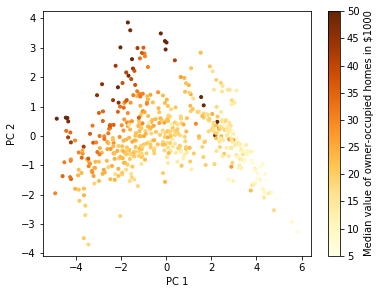

In [0]:
f = plt.figure(figsize=(6,4.5))
ax = f.gca()
prices = ax.scatter(boston_pca[:,0],boston_pca[:,1], c = house_prices, cmap = 'YlOrBr', marker = '.' )
plt.colorbar(prices, label = 'Median value of owner-occupied homes in $1000')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
#plt.savefig("drive/My Drive/AppliedDS/PCA.png", dpi = 150)
plt.show()

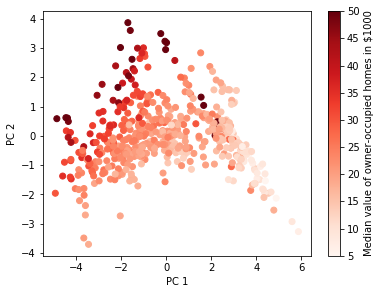

In [0]:
f = plt.figure(figsize=(6,4.5))
ax = f.gca()
prices = ax.scatter(boston_pca[:,0],boston_pca[:,1], c = house_prices, cmap = 'Reds' )
plt.colorbar(prices, label = 'Median value of owner-occupied homes in $1000')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
#plt.savefig("drive/My Drive/AppliedDS/PCA.png", dpi = 150)
plt.show()

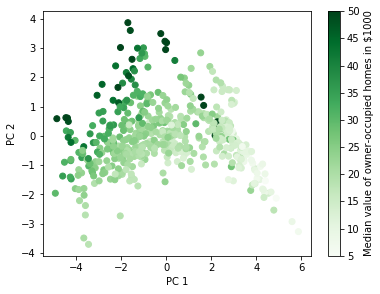

In [0]:
f = plt.figure(figsize=(6,4.5))
ax = f.gca()
prices = ax.scatter(boston_pca[:,0],boston_pca[:,1], c = house_prices, cmap = 'Greens' )
plt.colorbar(prices, label = 'Median value of owner-occupied homes in $1000')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
#plt.savefig("drive/My Drive/AppliedDS/PCA.png", dpi = 150)
plt.show()

**Answer to 6.4**: type here.

### Task 7 - PCA components (24 marks)
**7.1** Plot PCA components matrix as image, size 7 inches wide, 5 inches tall (4 marks). 

**7.2** Choose a suitable colormap, add a colorbar to the figure, add a suitable label to the colorbar (4 marks).

**7.3** Justify your choice of colormap in the provided text cell (1-2 sentences, 4 marks).

**7.4** Use the dataset's feature names as x-tick-labels, rotated by 90 degrees (4 marks).

**7.5** Save as PNG with 75 dpi (4 marks).

**7.6** Verify that the saved file has the correct size (7 x 5 inches) and upload it as part of your submission (4 marks).

In [0]:
components = pca.components_
components.shape

(11, 11)

In [0]:
components

array([[ 2.51649538e-01, -2.82517029e-01,  3.68095886e-01,
         3.62943836e-01, -2.09578526e-01,  3.39491644e-01,
        -3.46156334e-01,  3.36541020e-01,  2.09605488e-01,
        -2.07565854e-01,  3.32195701e-01],
       [-2.84570943e-01, -2.58499393e-01,  7.33274179e-02,
         2.55100547e-01,  4.53099809e-01,  3.16467604e-01,
        -3.95776310e-01, -1.77827749e-01, -4.43171918e-01,
         1.89680174e-01, -2.35905803e-01],
       [ 4.08896923e-01,  3.92087862e-01, -1.00302455e-02,
         1.05463691e-01,  4.64427883e-01, -5.84945908e-02,
         2.12950306e-02,  2.70246902e-01, -2.83063217e-01,
        -5.27424675e-01, -1.30168753e-01],
       [-7.70796207e-02,  2.77691652e-01, -8.36913032e-03,
         1.73184513e-01, -4.79493436e-01,  5.69485290e-02,
         6.22739189e-02, -1.75006938e-01, -6.82276359e-01,
        -6.35409851e-02,  3.86887728e-01],
       [ 4.22627708e-01,  3.26137240e-01,  8.92014521e-02,
         9.27387890e-02,  4.49935102e-02,  4.77832787e-02,
  

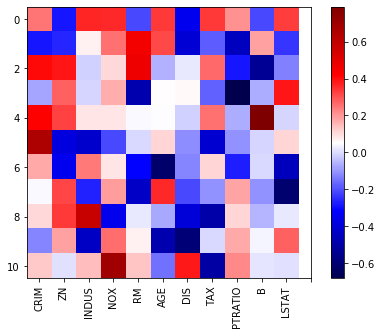

In [0]:
f = plt.figure(figsize = (7,5))
ax = f.gca()
img = ax.imshow(components, cmap = 'seismic')
plt.colorbar(img )
ax.set_xticks(range(0,12))
t = ax.set_xticklabels(boston_df.columns, rotation = 90)

In [0]:
pca.components_.shape

(11, 11)

**Answer to 7.3:** type here.

### Task 8 - Scree plot (12 marks)
**8.1** Make scree plot with grey dashed lines and black round markers, 5 inches wide, 4 inches tall. Label the axes appropriately. (4 marks).

**8.2** Save scree plot as svg (4 marks).

**8.3** Verify that the saved file has the correct size (5x4 inches) and upload it as part of your submission (4 marks).

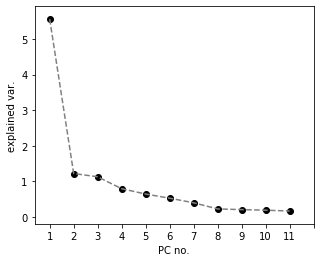

In [0]:
f = plt.figure(figsize = (5,4))
ax = f.gca()
ax.plot(pca.explained_variance_, linestyle='--', color = 'grey')
ax.scatter(range(0,11), pca.explained_variance_, marker='o', color = 'black')

ax.set_xlabel('PC no.')
ax.set_ylabel('explained var.')
ax.set_xticks(range(0,12))
ax.set_xticklabels(range(1,12))
plt.show()